# Unsupervised learning - PCA and clustering Task Notebook

## Introduction

This project aims to explore trends and patterns within U.S. arrest data using Python and data analysis techniques. We will leverage the publicly available dataset from the "US Arrests" Kaggle challenge, which provides information on various crime rates across different states in the United States [1].

The dataset, provided in the `UsArrests.csv` file, contains five key features for each state:

* **City:** Name of the state's most populous city
* **Murder:** Murder rate per 100,000 residents
* **Assault:** Assault rate per 100,000 residents
* **UrbanPop:** Percentage of the state's population living in urban areas
* **Rape:** Rape rate per 100,000 residents

By analyzing this data, we hope to gain insights into potential relationships between these factors and identify geographical regions or states with similar crime patterns. This exploration will involve data pre-processing, visualization techniques, and the application of clustering algorithms.

**Citation:**

[1]IIT Madras. (2022). US Arrests [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/3088445


## Exploring the data

In [61]:
# !pip install seaborn --upgrade
# sns.__version__

  Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.4 MB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# import matplotlib as mpl
import seaborn as sns
%matplotlib inline

arrests_df = pd.read_csv("UsArrests.csv",index_col="City")
arrests_df.head()


,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
# Check the data shape (number of rows and columns)
print(f"Data Shape: {arrests_df.shape}")

Data Shape: (50, 4)


In [4]:
# Check data types of each column
print(f"\nData Types:\n{arrests_df.dtypes}")


Data Types:
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object


In [5]:
# Check for duplicate rows
print(f"\nDuplicate Rows:\n{arrests_df.duplicated().sum()}")


Duplicate Rows:
0


In [6]:
# Check for missing values
print(f"\nMissing Values:\n{arrests_df.isnull().sum()}")


Missing Values:
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


In [7]:
# Get descriptive statistics for numerical columns
print(f"\nDescriptive Statistics:\n{arrests_df.describe()}")


Descriptive Statistics:
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


## Overview of the data's shape, summary statistics, data types, and missing values.
Here are some key observations and insights:

**Data Shape and Types:**

* The dataset contains **50 rows** (states) and **4 columns** (crime rates and urban population).
* All columns have the expected data types:
    * `Murder` and `Rape`: float64 (decimal)
    * `Assault` and `UrbanPop`: int64 (integer)
* No duplicate rows were found.
* No missing values are present in the data.

**Central Tendency:**
Understanding that this is an overview and does not tell the whose story:

* The average (mean) murder rate across all states is **7.79**, with a standard deviation of **4.36**. This suggests a spread of murder rates, with some states having significantly higher or lower values than the average.
* The average assault rate is **170.76**, with a standard deviation of **83.34**. This indicates significant variation in assault rates across states.
* The average urban population percentage is **65.54**, with a standard deviation of **14.47**. This suggests that the level of urbanization varies moderately across states.
* The average rape rate is **21.23**, with a standard deviation of **9.37**. Similar to other crime rates, this indicates variation in the reported rape rates across states.

**Readiness for Visualization:**

Based on the completed data exploration steps, the data appears ready for further analysis and visualization.

While the average values provide a starting point, further analysis and visualizations are needed to understand the full distribution of the data and identify potential relationships between factors.


## Visualizations: Distribution

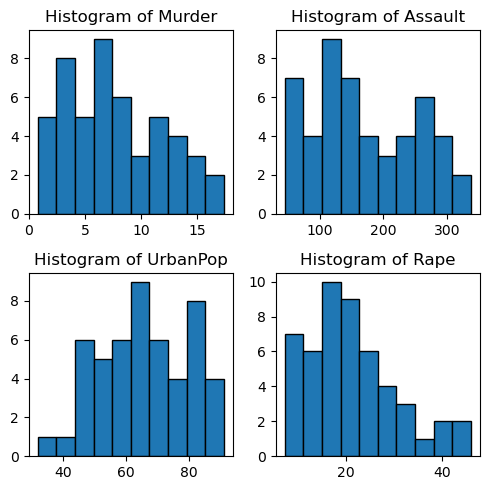

In [8]:
# Set up the figure and axes for a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

# Create a histogram for each variable
variables = ['Murder', 'Assault', 'UrbanPop', 'Rape']
for ax, var in zip(axs.flatten(), variables):
    ax.hist(arrests_df[var], bins=10, edgecolor='black')
    ax.set_title(f'Histogram of {var}')

# Improve layout
plt.tight_layout()
plt.show()

## Observations from our histograms:

* All four crime rates and urban population exhibit some level of variation across different states.
* Murder and assault rates show a wider spread compared to urban population and rape rates, as indicated by their higher standard deviations.

Further analysis and visualizations are needed like **correlation coefficients** to understand the relationships between different crime rates and urban population as well as applying **clustering** algorithms (e.g., K-means, hierarchical clustering) to group states with similar crime rate patterns to help get further insights into our data.


## CORRELATION ANALYSIS

In [9]:
# Suppress the annotation warning from jupyter notebook
"""seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, 
but in future may error or produce different behavior
annotation = ("{:" + self.fmt + "}").format(val).
"""
import warnings

warnings.filterwarnings("ignore", message=".*MaskedConstant.*")

Correlation Matrix:
             Murder   Assault  UrbanPop      Rape
Murder    1.000000  0.801873  0.069573  0.563579
Assault   0.801873  1.000000  0.258872  0.665241
UrbanPop  0.069573  0.258872  1.000000  0.411341
Rape      0.563579  0.665241  0.411341  1.000000



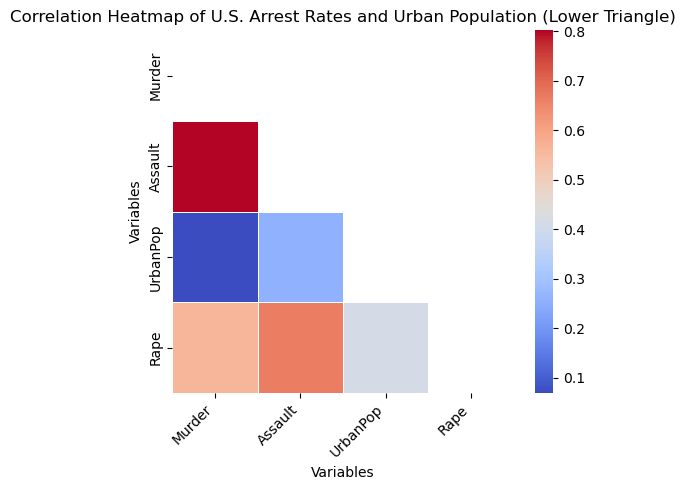

In [10]:
# Calculate correlation matrix
corr_matrix = arrests_df.select_dtypes(include=[np.number]).corr()

# Print correlation values (optional for discussion)
print("Correlation Matrix:\n", corr_matrix)
print()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap with annotations and mask
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, mask=mask)
plt.title("Correlation Heatmap of U.S. Arrest Rates and Urban Population (Lower Triangle)")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Add legend for colormap (optional)
# sm = plt.cm.ScalarMappable(cmap=sns.cm.coolwarm, norm=plt.Normalize(-1, 1))
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(-1, 1))
sm.set_array([])
plt.colorbar(sm, label="Correlation Coefficient", ax=ax)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

From the correlation plot above, it is evident that:

* **Violent crimes are positively correlated:** There's a strong positive correlation between **murder and assault rates**. This suggests that areas with higher murder rates tend to also have higher assault rates, and vice versa. A moderately positive correlation exists between **rape and assault**, indicating a slight tendency for areas with higher assault rates to also have higher rape rates.
* **Urban population has a weak relationship with crime rates:** There's a very weak negative correlation between **urban population and murder rate**. This suggests a slight tendency for areas with larger urban populations to have **lower** murder rates, but the relationship is very weak and might not be statistically significant. There's **no significant correlation** between urban population and assault or rape rates.

**These correlations are interesting to consider:**

* The strong correlation between violent crimes suggests that factors influencing one might also influence the others. Further investigation into these factors could be insightful.
* The weak negative correlation between urban population and murder rate is counterintuitive and needs further exploration. Factors like demographics, policing strategies, and socioeconomic conditions might play a role in this relationship. The lack of correlation between urban population and other crime rates suggests these crimes might not be directly tied to population size.

**Overall, the presence of both positive and weak correlations highlights the complexity of crime rates.** While some crimes seem to be linked, the relationships aren't always straightforward.
This data structure is a good candidate for further analysis using techniques like Principal Component Analysis (PCA). PCA can help identify underlying patterns in the data and potentially reduce the number of variables needed for further analysis, especially if some variables capture similar information.



## PCA

Imagine you have a large dataset with many variables, like our U.S. arrest data, (although ours is small compared to some), with murder rates, assault rates, and urban population. PCA is a technique that helps us simplify this data while retaining the most important information. It does this by finding a new set of variables, called **principal components (PCs)**, that capture the most significant patterns in our original data. PCA doesn't directly measure anything specific. Instead, it focuses on **capturing the variance** in our data. By identifying the principal components, we can understand the underlying structure of our data and see how the different variables are related.

In simple terms, we have information(types of crime rates), but it's all spread out in differenct directions(variables). PCA is like finding the main ways the crimes are spread out (capturing the variance).


In [31]:
from sklearn.decomposition import PCA

# Select numerical features for PCA
pca = PCA(n_components=4)  # Choose the number of principal components (2 for 2D visualization)
X_trans = pca.fit_transform(arrests_df[['Murder', 'Assault', 'Rape', 'UrbanPop']])  # Apply PCA to the selected features
df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.802164,11.448007,-2.494933,2.407901
1,92.827450,17.982943,20.126575,-4.094047
2,124.068216,-8.830403,-1.687448,-4.353685
3,18.340035,16.703911,0.210189,-0.520994
4,107.422953,-22.520070,6.745873,-2.811826


In [32]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.73240025 14.21240185  6.48942607  2.48279   ]


In [33]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.65534221e-01 2.78173366e-02 5.79953492e-03 8.48907879e-04]


In [34]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11485102 7213.10721735 7255.2198681  7261.38411429]


In [35]:
print(X_trans.shape)

(50, 4)


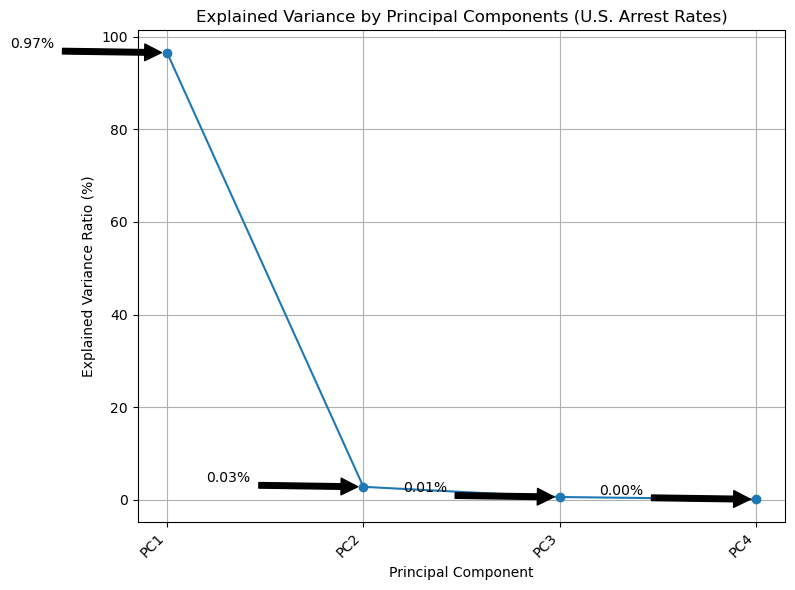

In [37]:
# import matplotlib.pyplot as plt

def explained_variance_plot(pca, labels=None):
  """
  Creates a scatter plot visualizing explained variance by principal components.

  Args:
      pca: PCA object containing explained variances.
      labels: List of labels for principal components (optional).

  Returns:
      None (displays the plot).
  """

  explained_variance = pca.explained_variance_ratio_  # Get explained variance ratios

  plt.figure(figsize=(8, 6))  # Adjust figure size for readability

  # Plot explained variance
  plt.plot(range(1, len(explained_variance) + 1), explained_variance * 100, marker='o', linestyle='-')
  plt.xlabel("Principal Component")
  plt.ylabel("Explained Variance Ratio (%)")
  plt.title("Explained Variance by Principal Components (U.S. Arrest Rates)")
  plt.grid(True)

  # Add annotations for explained variance ratio
  for i, ev in enumerate(explained_variance):
    plt.annotate(f"{ev:.2f}%", (i + 1, ev * 100), xytext=(i + 0.2, ev * 100 + 1), 
                 arrowprops=dict(facecolor='black', shrink=0.05))

  # Add labels for principal components (optional)
  if labels is not None:
    plt.xticks(range(1, len(explained_variance) + 1), labels, rotation=45, ha='right')  # Rotate x-axis labels for better readability

  plt.tight_layout()
  plt.show()

# Call the plot function with your PCA object without labels
# explained_variance_plot(pca)

# Provide labels for principal components
# component_labels = ['Murder', 'Assault', 'Rape', 'UrbanPop']
component_labels = ["PC1", "PC2", "PC3", "PC4"]
explained_variance_plot(pca, labels=component_labels)

# Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

It can be seen from plot above that, PC1 explains most of the variance than subsequent components. In other words, most of the features are explained and encompassed by PC1.

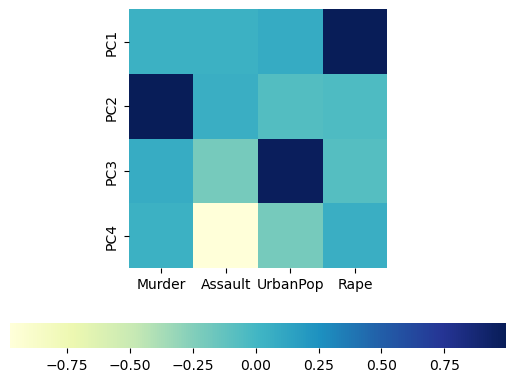

In [51]:
# Extract the components from the PCA model
components = pca.components_.T

# Create a DataFrame from the components for heatmap visualization
component_df = pd.DataFrame(components, columns=list(arrests_df.columns))

# Create the heatmap using Seaborn
ax = sns.heatmap(component_df,
                 cmap='YlGnBu',  # Adjust colormap as desired
                 yticklabels=[f"PC{i+1}" for i in range(component_df.shape[0])],  # Label principal components
                 xticklabels=list(arrests_df.columns),  # Use variable names as x-axis labels
                 cbar_kws={"orientation": "horizontal"})  # Horizontal colorbar

# Set aspect ratio for square heatmap
ax.set_aspect("equal")

# Display the heatmap
plt.show()

# Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

### Effect of variables on each components
`components_` attribute provides principal axes in feature space, representing the directions of maximum variance in the data. This means, we can see influence on each of the components by features.

## CLUSTER ANALYSIS
We will perform both Hierarchical Clustering and K-means with these data and
compare the results.

### Hierarchical clustering


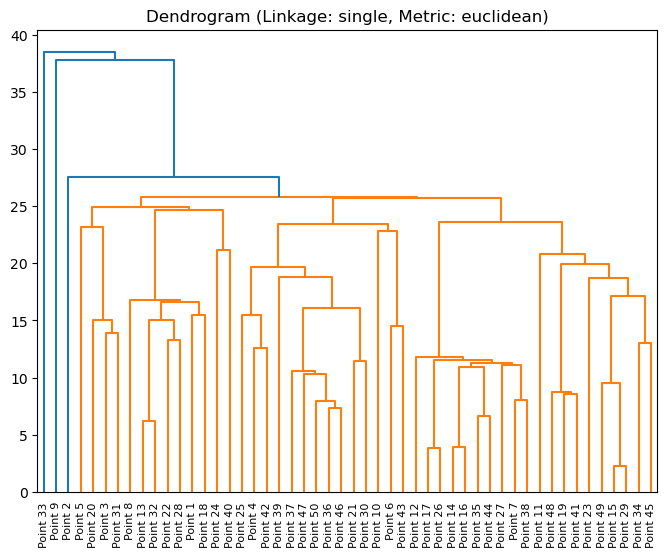

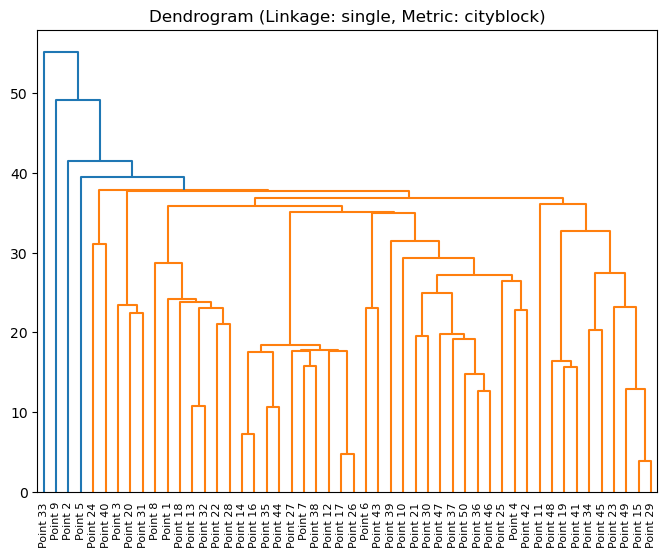

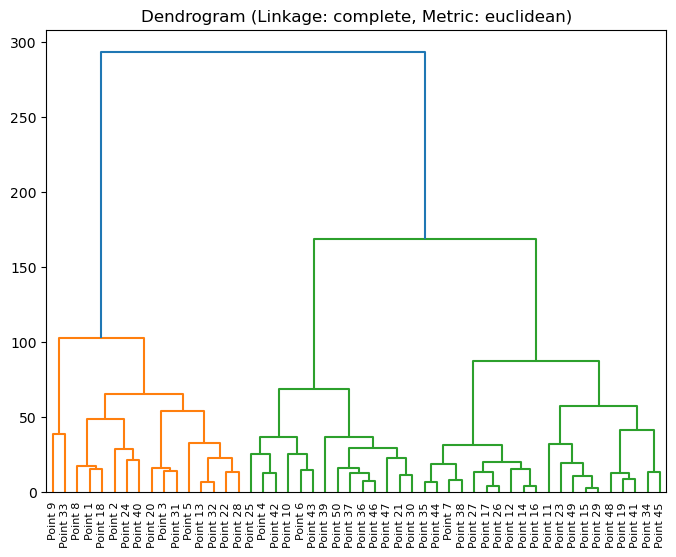

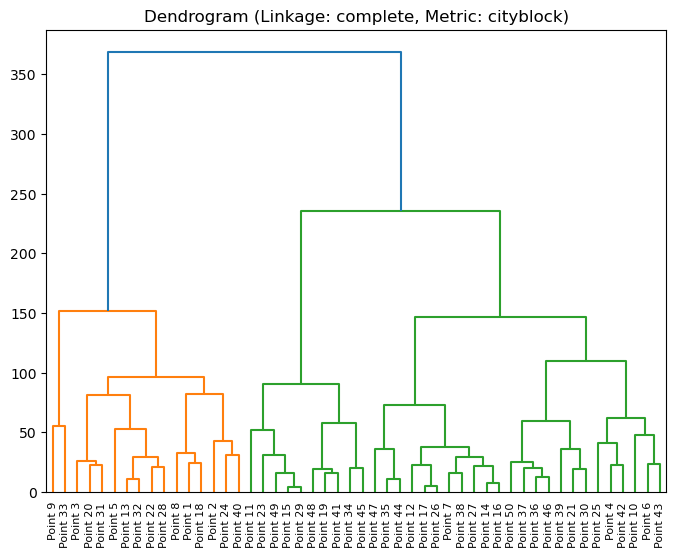

In [67]:
# from scipy.cluster.hierarchy import dendrogram, linkage

# Define functions for clarity
def plot_dendrogram(data, linkage_method, metric):
  """
  Plots a dendrogram for the given data using the specified linkage method and metric.

  Args:
      data: A list of data points (lists or arrays representing coordinates).
      linkage_method: The linkage method to use ("single", "complete", "average").
      metric: The distance metric to use ("euclidean", "cityblock").
  """
  distance_matrix = linkage(data, method=linkage_method, metric=metric)
  plt.figure(figsize=(8, 6))
  dendrogram(distance_matrix, labels=[f"Point {i+1}" for i in range(len(data))])
  plt.title(f"Dendrogram (Linkage: {linkage_method}, Metric: {metric})")
  plt.show()

# Run for different linkage methods and distance metrics
linkage_methods = ["single", "complete"]
distance_metrics = ["euclidean", "cityblock"]

for linkage_method in linkage_methods:
  for distance_metric in distance_metrics:
    plot_dendrogram(arrests_df.copy(), linkage_method, distance_metric)


We run the agglomerative hierarchical clustering with that number of clusters (and the linkage method and distance metric used for that
dendrogram).

In [92]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Select two features
selected_features = ['Murder', 'Assault']
X = arrests_df[selected_features] 

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Print the shape of the scaled data
print("Scaled data shape:", scaled_X.shape)

Scaled data shape: (50, 2)


In [97]:
# Define clustering parameters
n_clusters = 2  # Number of clusters chosen
linkage_single = "complete"
metric = "euclidean"

# Perform clustering
model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_single, metric=metric)
model.fit(scaled_X)

# Get cluster labels
cluster_labels = model.labels_

# Print cluster labels
print("Cluster labels:", cluster_labels)

Cluster labels: [1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0]


In [98]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette score (for reference)
silhouette_score = silhouette_score(scaled_X, cluster_labels)
print("Silhouette score:", silhouette_score)

Silhouette score: 0.5779375542748371


### Conclusions
There are some limitations to consider looking at the Silhouette score and agglomerative clustering in this scenario.

Having used varying values of `n_clusters`, 2 seems to return the best percentage of 57%, considered moderate, indicating a decent separation between the two clusters. However, higher values closer to 1 would suggest better overall cluster separation. The number of clusters (2) was predetermined based on the dendrogram, not necessarily optimized using the score. 

To increase our confidence, we need some visual analysis like a scatter plot to visually assess the separation between the clusters.

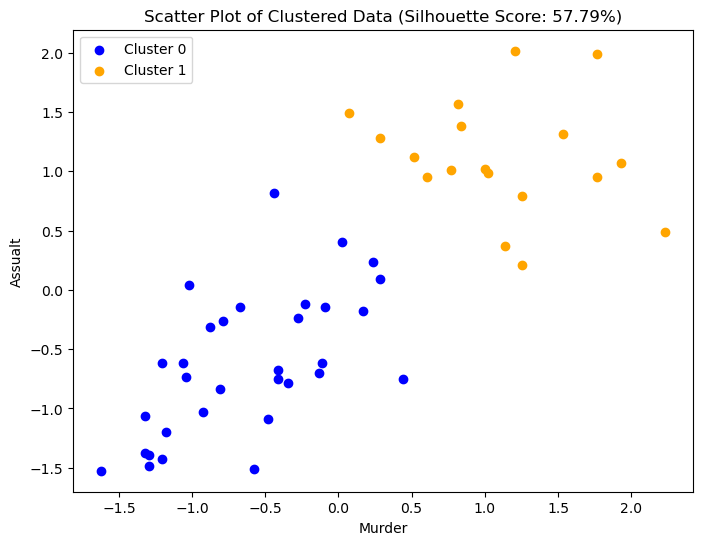

In [103]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(scaled_X[cluster_labels == 0, 0], scaled_X[cluster_labels == 0, 1], label="Cluster 0", color="blue")
plt.scatter(scaled_X[cluster_labels == 1, 0], scaled_X[cluster_labels == 1, 1], label="Cluster 1", color="orange")

# Retrieve and format the Silhouette score as a percentage string
silhouette_score_str = f"{silhouette_score:.2%}"

# Set the plot title with the Silhouette score
plt.title(f"Scatter Plot of Clustered Data (Silhouette Score: {silhouette_score_str})")

plt.xlabel("Murder")
plt.ylabel("Assualt")
plt.legend()
plt.show()

The scatter plot visually confirms the presence of two separate clusters based on the distribution of data points.

Overall, the results suggest that the clustering process has resulted in two reasonably separated clusters in the data and we can be confident about result of the silhouette score. It indicates that groups likely formed based on high or low occurrences of both "Murder" and "Assault" compared to the average.

### K-means clustering

In simple terms, K-means clustering acts like an organizer trying to efficiently group data based on some similarity.

In [104]:
from sklearn.cluster import KMeans

# Define the number of clusters (experiment with different values)
n_clusters = 2

# Create a KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Set random state for reproducibility

# Fit the model to the data (performs the clustering)
kmeans.fit(scaled_X)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Print cluster labels
print("Cluster labels:", cluster_labels)

Cluster labels: [1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0]


/home/mcode/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


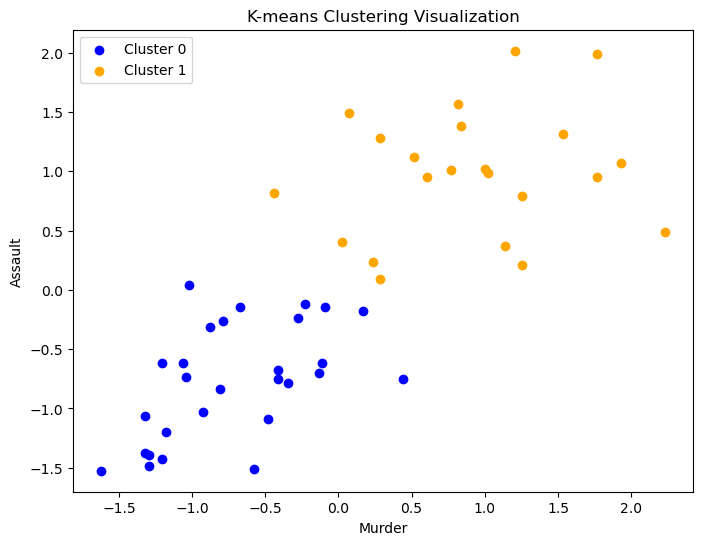

In [105]:
cluster_colors = ['blue', 'orange']

# Create a scatter plot
plt.figure(figsize=(8, 6))
for cluster, color in zip(range(n_clusters), cluster_colors):
    # Select data points belonging to the current cluster
    cluster_data = scaled_X[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster}", color=color)

plt.title("K-means Clustering Visualization")
plt.xlabel("Murder")
plt.ylabel("Assault")
plt.legend()
plt.show()

The clustering looks similar to our heirachical clustering.  K-means randomly picks K data points as initial representatives for each cluster.

**Cluster Distribution:**
* Most data points (33) fall into cluster 1.
* Fewer data points (17) belong to cluster 0.

**Potential Implications:**
* **Cluster 1:** This cluster might represent states with relatively higher occurrences of both murder and assault, compared to the average of the entire dataset.
* **Cluster 0:** This cluster might represent states with relatively lower occurrences of both murder and assault, compared to the average.